<a href="https://colab.research.google.com/github/kecitclub/moyeMoye/blob/main/bgimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: make a function that passes in the prompt and returns the image generated from freepik

import requests
import json
import base64
from PIL import Image
import io
from IPython.display import display

def generate_freepik_image(prompt, neg=''):
    # payload = {
    #     "prompt": prompt,
    #     "styling": {
    #         "style": "photo",
    #     }
    # }



    url = "https://api.freepik.com/v1/ai/text-to-image"

    payload = {

        "prompt": prompt,
        "styling": {
            "framing": "first-person",
            "style": "photo"
        },
        "negative_prompt": neg,
        "guidance_scale": 1.5,
        "image": {"size": "square_1_1"}
    }

    headers = {
        "x-freepik-api-key": "FPSX6621b83d3b094c988ea254b3a1241f0d", # Replace with your actual API key
        "Content-Type": "application/json"
    }

    try:
        response = requests.request("POST", url, json=payload, headers=headers)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        response_json = response.json()

        image_data = response_json['data'][0]['base64']
        if image_data:
            image_bytes = base64.b64decode(image_data)
            image = Image.open(io.BytesIO(image_bytes))

            return image
        else:
            print("No image data found in the API response.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error during API request: {e}")
        return None
    except (KeyError, IndexError) as e:
        print(f"Error parsing API response: {e}")
        print(response.text) # Print the response for debugging
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [3]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 4.0 MB/s eta 0:00:00


In [4]:
from groq import Groq
def chat(prompt):
  client = Groq(api_key="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")
  completion = client.chat.completions.create(
      model="llama-3.3-70b-versatile",
      messages=[{
          "role":"user",
          "content":[
              {"type": "text", "text": prompt}
          ]
      }],
      temperature=2,
      max_tokens=1024,
  )
  return completion.choices[0].message.content


In [17]:
def create_image_prompt(product,vibe):
    """
    Generates a prompt for an image generator based on the provided vibe and product.
    The function ensures the image background matches the vibe and aesthetic associated
    with the product, but the product itself is not depicted in the image. The image
    includes empty space in the lower half and is viewed from a natural human height.

    Parameters:
    vibe (str): The desired ambiance or feeling of the image.
    product (str): The product around which the aesthetic is centered.

    Returns:
    str: A detailed prompt describing the desired image background without mentioning the product.
    """

    # Sample description based on the vibe and product
    # description = f"Create and return a prompt to generate an image that embodies the vibe of '{vibe}' with an aesthetic that could be associated with '{product}'. "\
    #               "The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery "\
    #               "that suggest the vibe without showing the product itself. The image should be composed with empty space in the lower half, "\
    #               "viewed from a straight-ahead perspective at natural human height. Return only the prompt as your response is sent to the image generator directly"


    description = f"Create and return a prompt to generate an image that will act as the background for an product which will be added later in post-production. the produced image embodies the vibe of '{vibe}' with an aesthetic that could be associated with '{product}'. "\
                  "The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery "\
                  "that suggest the vibe without showing the product itself. The image must be composed with empty space in the lower half, "\
                  "Return only the answer that you would reply. Donot include any background references and product details. Just to the point answer."

    return description


In [18]:
while True:
  try:
    prompt = chat(create_image_prompt('laptop', 'Nature'))
    break
  except Exception as e:
    continue

In [15]:
prompt

'Create a serene and earthy background image featuring a blurred forest with birch trees and a fading mist, warm golden hues, and soft, feathery-textured moss covering the surrounding trees and rocks. Incorporate elements such as twinkling string lights wrapped around a tree branch, a natural wood palette, or an blurred mountain silhouette at the top with hues of lavender and blue for the sky and muted tan for the tree foliage, while keeping the bottom half mostly empty apart from subtle texture blending seamlessly, allowing ample negative space below to perfectly frame your subject in any composition.'

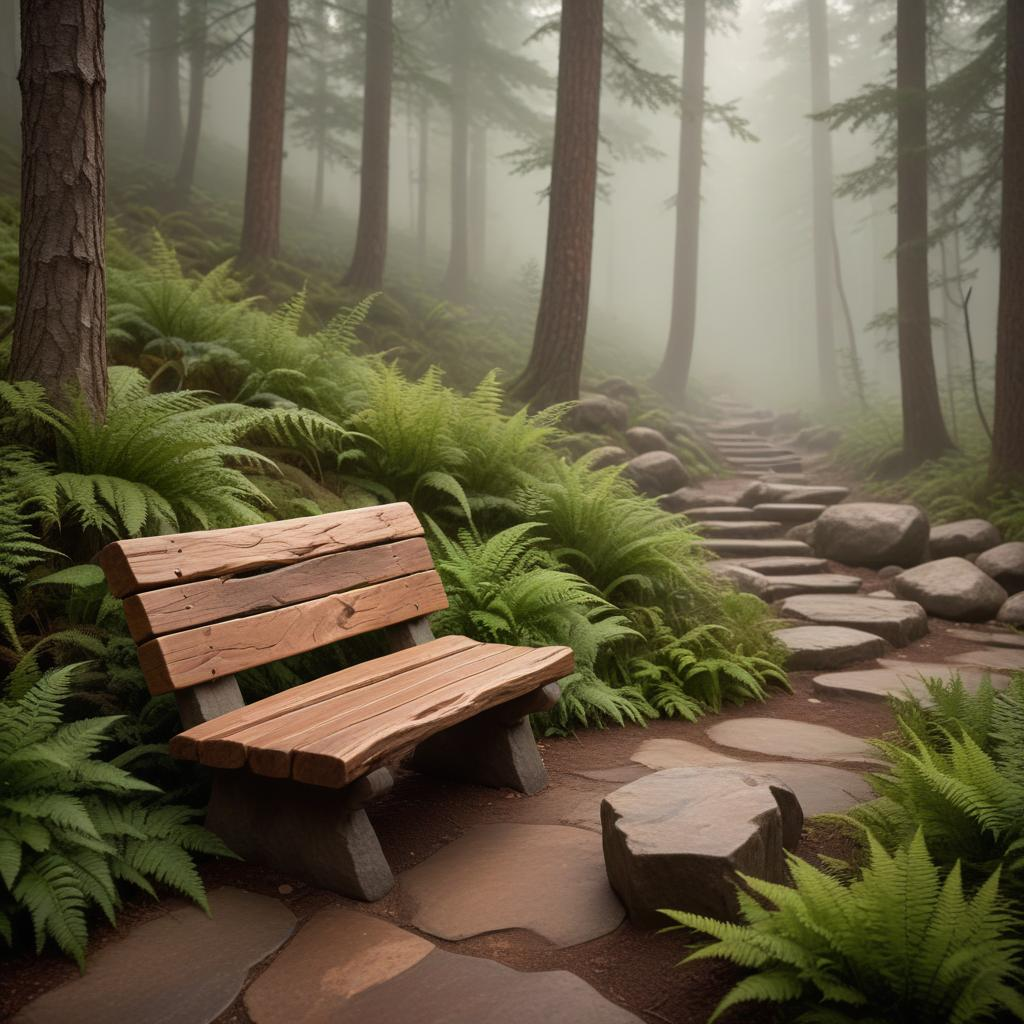

In [19]:
image = generate_freepik_image(prompt)
display(image)

In [9]:
import os

if image:
    # Generate a unique filename
    import uuid
    unique_filename = str(uuid.uuid4()) + ".png"  # Use UUID for uniqueness
    filepath = os.path.join("/content", unique_filename) # Save in /content directory

    # Save the image with the unique filename
    image.save(filepath)
    print(f"Image saved as: {unique_filename}")

    # Download the image
    from google.colab import files
    files.download(filepath)

Image saved as: 4afdd972-09ac-4a78-bbcc-f0dda175e67a.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
def create_image_prompt_ocassion( product,vibe="festive"):

    """
    Generates a prompt for an image generator based on the provided vibe and product.
    The function ensures the image background matches the vibe and aesthetic associated
    with the product, but the product itself is not depicted in the image. The image
    includes empty space in the lower half and is viewed from a natural human height.

    Parameters:
    vibe (str): The desired ambiance or feeling of the image.
    product (str): The product around which the aesthetic is centered.

    Returns:
    str: A detailed prompt describing the desired image background without mentioning the product.
    """

    # Sample description based on the vibe and product
    # description = f"Create and return a prompt to generate an image that embodies the vibe of '{vibe}' with an aesthetic that could be associated with '{product}'. "\
    #               "The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery "\
    #               "that suggest the vibe without showing the product itself. The image should be composed with empty space in the lower half, "\
    #               "viewed from a straight-ahead perspective at natural human height. Return only the prompt as your response is sent to the image generator directly"

    occasions = {
        "Maghe Sankranti":"Create an image that combines festive elements of Maghe Sankranti. Include a colorful kite alongside a traditional wooden spinning top, set against a vibrant purple background. Adjacent to these, place a platter of round small sesame and puffed rice  laddus in a plate. Additionally, depict two traditional brass bowls, one filled with sesame seed balls and the other with cubes of jaggery, set on an ornate wooden tray. This composition should evoke the playful and joyous atmosphere of Maghe Sankranti while highlighting the traditional foods associated with the festival.",
        "Holi": "Create a vibrant and colorful image that captures the spirit of Holi, the festival of colors, without showing any human. The scene should feature a festive environment with colorful powders scattered in the air and on the ground, creating a vivid, multicolored landscape. Include elements like small, empty bowls of different colors that were used to hold the powders. The background should show trees and bushes lightly dusted with various hues of Holi powders, and the ground should be splattered artistically with a mix of bright colors. Add festive decorations such as colorful ribbons and paper streamers to enhance the celebratory atmosphere, all set under a bright, clear sky.",
        "Sahid Diwas": "Create a solemn and respectful image to commemorate Martyrs' Day in Nepal. The scene should feature a central monument or memorial, elegantly designed, representing the courage and sacrifice of the martyrs. Surround the monument with multiple lit oil lamps, casting a gentle glow that signifies remembrance and honor. Include a backdrop of the Nepalese national flag, subtly woven into the scene, emphasizing national pride. The setting should be serene, with a wreath of marigold flowers placed at the base of the monument as a tribute. The atmosphere should convey reverence and gratitude, capturing the solemnity of the day without any human figures, focusing solely on the symbolic elements of remembrance.",
        "Basant Panchami": "Create a vibrant and colorful image celebrating Basant Panchami, focusing on the symbolic elements associated with knowledge and the arts. Feature an elegantly arranged scene surrounded by neatly stacked books and writing instruments, all adorned with marigold flowers and soft petals. Include subtle elements like floating lotus flowers and peacock feathers in the background, enhancing the festive and cultural atmosphere. The setting should be bright and colorful, echoing the spirit of spring, with no human figures or faces of deities, maintaining a focus on the items symbolic of learning and creativity.",
        "Sonam Losar":"Create a festive and culturally rich image to celebrate Sonam Losar, the Tamang New Year. The scene should feature traditional Tamang elements such as colorful prayer flags, and a khapse (a traditional fried pastry), prominently displayed on a vibrant, decorative cloth. Include a depiction of the twelve animals of the Tibetan zodiac, with the animal representing the current year highlighted. The background should reflect the Himalayan mountains, symbolizing the region's geography. The setting should be festive with a warm and welcoming atmosphere, using a color palette of red, yellow, and green to represent prosperity, peace, and harmony. This image should be simple yet symbolic, suitable for a post that celebrates the cultural heritage and traditions of the Tamang community during Sonam Losar.",
    }

    if product in occasions:
          description = f"""
          Create and return a prompt to generate an image that embodies the vibe of '{(vibe if (product!='Sahid Diwas') else 'bravery')}' with an aesthetic that could be associated with the occasion : '{product}'.The description of occasion  are {occasions[product]}
                  The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery
                  that suggest the given occasion.the prompt must ensure that there should not be any human face in the photo . Also it should not include face of any gods as well.Faces of the god should not be shown in the statue as well.
                  Return only the answer that you would reply. Donot include any background references . Just to the point answer.

                  """
          return description




    description = f"Create and return a prompt to generate an image that embodies the vibe of '{vibe}' with an aesthetic that could be associated with the occasion : '{product}'. "\
                "The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery "\
                "that suggest the given occasion. "\
                " Return only the answer that you would reply. Donot include any background references . Just to the point answer."

    return description

In [92]:
while True:
  try:
    prompt = chat(create_image_prompt_ocassion( 'Sonam Losar'))
    break
  except Exception as e:
    continue

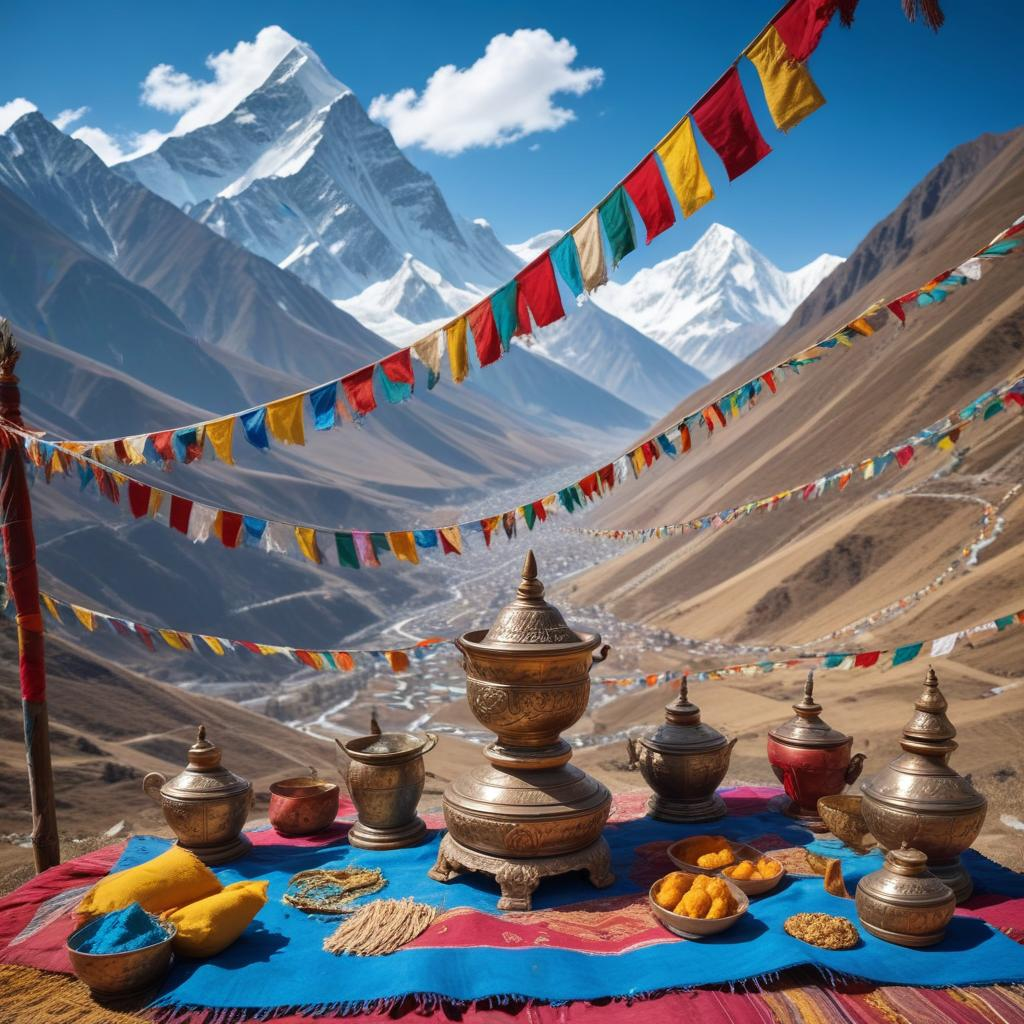

In [93]:
image = generate_freepik_image(prompt)
display(image)